In [73]:
import cmath
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, simplify
from sympy.solvers import solve

print ("\nElectrical Circuits\n")
vo = Symbol("vo")
vr = Symbol("vr")
ir = Symbol("ir")
ic = Symbol("ic")
il = Symbol("il")
r = Symbol("r")
omega = Symbol("omega")
c = Symbol("c")
l = Symbol("c")


eq1 = (vr + vo - 1, 
       ir - ic - il, 
       vr - ir*r,
       vo - ic/(1j*omega*c),
       vo - 1j*omega*l*il)
sol = solve(eq1, (vo, vr, ir, ic, il))
vos = simplify(sol[vo])
print(vos)




Electrical Circuits

c*omega/(I*c**2*omega**2*r + c*omega - I*r)


C:\Users\Rene\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


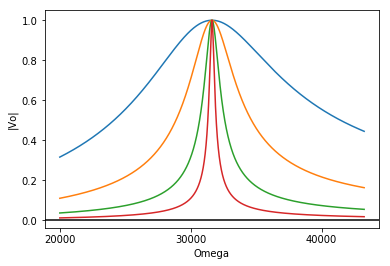

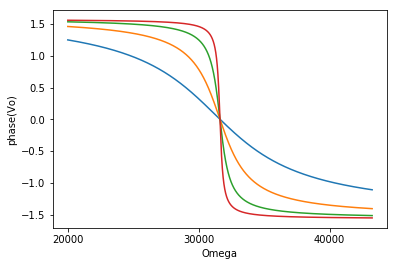

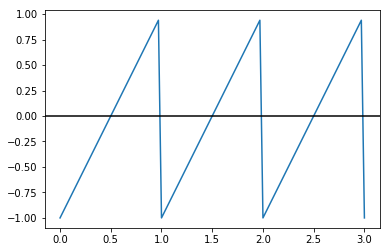

In [77]:
numvalue = {c: 10**-6, l: 10**-3}
vosnum = vos.subs(numvalue)
Resistance = (100, 300, 900, 2700)
omega_list = np.linspace(20000, 43246, 1e5)

def Vo(omega):
    C = 1e-6
    L = 1e-3
    return (-1j*omega*L)/(-1j*omega*L - R + R*C*L*omega*omega)

for k in range(len(Resistance)):
    R = Resistance[k]
    Vos = []
    for i in range(len(omega_list)):
        w = omega_list[i]
        Vos.append(Vo(w))
    plt.plot(omega_list,np.abs(Vos))
plt.xlabel("Omega")
plt.ylabel("|Vo|")
plt.xticks([20000, 30000, 40000])
plt.axhline(0, color = 'k')

plt.show()

for k in range(len(Resistance)):
    R = Resistance[k]
    Vos = []
    for i in range(len(omega_list)):
        w = omega_list[i]
        Vos.append(Vo(w))
    plt.plot(omega_list,np.angle(Vos))
plt.xlabel("Omega")
plt.ylabel("phase(Vo)")
plt.xticks([20000, 30000, 40000])
plt.show()

def vsaw(t, T=1.0):
    return 2*((t/T)%1) - 1
    
t = np.linspace(0,3,100)
plt.plot(t,vsaw(t))
plt.axhline(0, color = 'k')



In [78]:
numvalue = {c: 10**-6, l: 10**-3}
vosnum = vos.subs(numvalue)
w_r = 1/np.sqrt(L*C)
alist = (1/np.sqrt(256)) * vsaw(np.arange(256)/256.0)
blist = np.sqrt(256) * np.fft.fft(alist)


omegares = 1./np.sqrt(np.prod(list(numvalue.values())))
alist = (1/np.sqrt(256)) * vsaw(np.arange(256)/256.0)
blist = np.sqrt(256) * np.fft.fft(alist)

def plot3(fac, w):
    omegai = fac * omegares
    
    volist = np.concatenate([complex(vosnum.subs({omega: omegai*s, r:w}).evalf()) 
                                 for s in np.arange(1, 129)], [0.0],
                            [complex(vosnum.subs({omega: omegai*s, r:w}).evalf()) 
                                 for s in np.arange(-127, 0)])
    vtrans = np.fft.ifft(blist * volist)
    plotlist = np.array([[(k+1)/256., vtrans[k%256]] for k in range(768)])
    plt.plot(plotlist[:,0], plotlist[:,1])
    plt.axhline(0)
    plt.show()

plot3(1, 2700.0)
plot3(1/3., 200.0)
plot3(3.0, 5.0)


TypeError: 'list' object cannot be interpreted as an integer

In [69]:
omega = Symbol("omega")
numvalue = {omega: 10**-6, r: 10**-3}
vosnum.subs(numvalue)

9.99999999999e-13 + 9.99999999999e-7*I

In [38]:

eq2 = (ir * (r + 1/(1j*omega*c) + 1j*omega*l) + vo - 1,
       ir - (1j*omega*c + 1/(1j*omega*l)) * vo)
sol2 = solve(eq1, (ir, r, omega))
vos2 = simplify(sol2[vo])
irs = simplify(sol2[ir])
power = (r**2) *( sympy.abs(irs)**2)
flist3 = [sympy.abs(vos2.subs(numvalue).subs({r: 10.0*3**s})) 
            for s in range(0, 3)]
omega_axis = np.linspace(10000, 70000, 1000)
lines = 
plt.setp(lines[0], lw=2)
plt.setp(lines[1], ls='--'
plt.minorticks_on()
plt.show()

# replicate fig. 2.10

SyntaxError: invalid syntax (<ipython-input-38-16ef95e5484c>, line 12)

In [ ]:
def NoisyRec(w,h): #rectangle
    L = 256
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    for i in np.arange(center[0]-w//2,center[0]+w//2): #width
        for j in np.arange(center[1]-h//2,center[1]+h//2) : #height
            aperture[int(i)][int(j)] = 1
            noisy = aperture * np.random.random([L,L])
    return noisy

A = fft2(NoisyRec(100,100))
B = fft2(Gaussian(100))
C = A/B
Corrected = ifft2(C)
plt.imshow(np.abs(Corrected), cmap = 'gray')